<a href="https://colab.research.google.com/github/Aragnzlz/SIMULACION-I/blob/main/Ejemplo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo: Flecha y cojinete

Una flecha será embonada en un cojinete como se muestra a continuación

<img src="cojinete.png">

Si $x_1$ sigue una distribución normal con media $1.5$ y varianza $0.0016$, y $x_2$ esta misma distribución con media $1.48$ y varianza $0.0009$, determine:

a) La probabilidad de que haya interferencia.

b) El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de $0.01$, con un nivel de seguridad del $95\%.$

Vamos a resolver este problema, procurando seguir la metodología vista en el curso.

### 1. Identifique las variables

Tenemos dos: $x_1$ y $x_2$.

### 2 y 3. Determine la distribución de probabilidad y modele las variables aleatorias

En el planteamiento ya se especifica que $x_1 \sim N(1.5, 0.04)$ y que $x_2 \sim N(1.48, 0.03)$.

### 4. Defina el modelo del sistema y los objetivos de la simulación

La diferencia $x_1 - x_2$ modela adecuadamente el sistema.

Si $x_2 - x_1 > 0$ el diametro de la flecha es más grande que el espacio en el cojinte y, por tanto, hay interferencia. De lo contrario, las piezas embonan sin problema.

Objetivo: determinar la frecuencia con que esto ocurre, lo cual nos da una esrimación de la probabilidad de interefrencia.

Una forma de implementarlo es mediante el siguiente código.

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

Generamos una función para identificar el número de veces que existe interferencia.

In [5]:
def interferencia():                #Esta función devuelve el valor 1 si hay interferencia o 0 si no la hay.
    interf=0
    x_1 = random.gauss(1.50,0.04)    #La funcion gauss genera un número que sigue una distribucion normal con
    x_2 = random.gauss(1.48,0.03)   # la media y la desvicion estandar especificados.
    if 0.0 < x_2 - x_1:
        interf += 1
    return interf #Nos devuelve un vector de 0´s y 1´s

### 5. Diseñe el experimento

Para estimar la probabilidad de interferencia, ejecutamos $n$ veces la función anterior y calculamos de manera acumulativa
la probabilidad de interferencia.

In [10]:
def prob_inter(n):
    prob = []                       # Esta funcion devuelve esta lista "prob", con los valores de la probabilidad
    inter = 0                       # estimada al contar las veces que hay interferencia y dividir entre las veces que
    for i in range(n):              # se ha reptido la observacion mientras aumenta el numero de iteraciones.
        inter += interferencia()
        prob.append(inter/(i+1))
    return prob

In [16]:
X = prob_inter(50000)                # Asignamos valores a n y realizamos el experimento

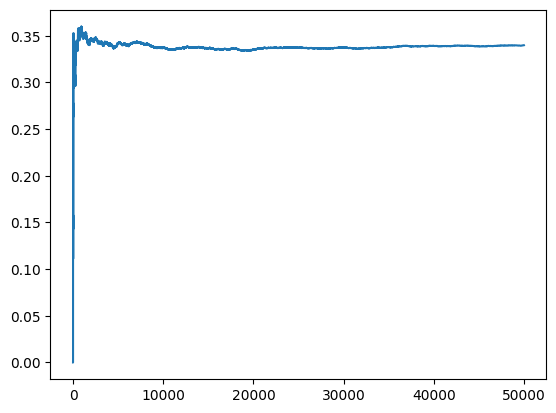

In [17]:
plt.plot(X)                         # La gráfica muestra que la convergencia está garantizada con 500 iteraciones
                                    # Sin embargo, diferentes ejecuciones darán resultados distintos

In [18]:
print(np.mean(X), np.std(X))

0.3381821301962535 0.006002173779419417


### 6. Repita el experimento $n$ veces

Una forma de hacerlo es mediante el siguiente codigo.

In [22]:
def modelo(n):
    lista=[]
    for i in range(n):
        s = prob_inter(500)
        lista.append(np.mean(s))
    return lista

In [23]:
Y = modelo(120)

Y es una muesfra donde cada $x_i$ es la probabilidad de que exista interferencia.

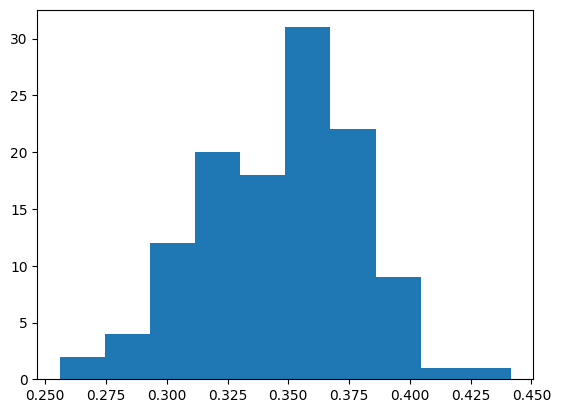

In [13]:
plt.hist(Y)
plt.show()

In [14]:
print(np.mean(Y), np.std(Y)) #Probabilidad de interferencia

0.34681098086870393 0.03193148704180587


### Paso 7. Hallamos el intervalo de confianza.

$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

$\textbf{PARA DETERMINAR EL INTERVALO DE CONFIANZA}$ \\
Para determinar el intervalo de confianza podemos utilizar el método del pivote.
Determinemos el intervalo de confianza para $\mu$ , al nivel de sgnificancia $1-\alpha$

Sea
$$
U = \frac{\bar{x}-E(\bar{x})}{\sqrt{V[\bar{x}]}}
$$
El cual podemos utilizar como pivote.

Para $\bar{x}$ tenemos que
*   $E[\bar{x}] = E[\frac{1}{n} (x_1 +...+ x_n)] = \frac{1}{n} (E[x_1] + ...+ E[x_n]) = \frac{n\mu}{n} = \mu $
*   $var[\bar{x}] = var[\frac{1}{n} (x_1 + ...+ x_n)] = \frac{1}{n^2} (var[x_1] + ...+ var[x_n]) = \frac{n\sigma^2}{n^2} = \frac{\sigma^2}{n}$
Sustituimos en U

$$
U = z = \frac{\bar{x}-E(\bar{x})}{\sqrt{V[\bar{x}]}} = \frac{\bar{x}-\mu}{\sqrt{\frac{\sigma^2}{n}}} = \frac{\bar{x}-\mu}{\sigma}\sqrt{n} \sim N(0,1) --- (1)
$$
Donde z es un pivote.

Para determinarl el intervalo de confizanza para $\mu$ tenemos que
$$
(-z_{\frac{\alpha}{2}} < z < z_{\frac{\alpha}{2}})
$$
Ya que es una prueba de dos colas, ahora, dado que buscamos el intervalo para $\mu$, utilizamos (1) para despejar a $\mu$. \\
Sustutuyendo
$$
-z_{\frac{\alpha}{2}} < \frac{\bar{x}-\mu}{\sigma}\sqrt{n} < z_{\frac{\alpha}{2}} \\
-z_{\frac{\alpha}{2}} \sigma < (\bar{x}-\mu)\sqrt{n} < z_{\frac{\alpha}{2}} \sigma \\
-z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} < (\bar{x}-\mu) < z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \\
\bar{x}-z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} < \mu < \bar{x} +z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}
$$

Por lo tanto, el nivel de confianza para $\mu$ al nivel de confianza $1-\alpha$ es:
$$
(\bar{x}-z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}, \bar{x} +z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}})
$$

In [ ]:
np.mean(Y)

0.3431585123951437

In [19]:
np.std(Y)

0.03193148704180587

In [ ]:
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50)

(0.3346527670160421, 0.35166425777424537)

### Para determinar el número de simulaciones

Para encontrat el nímero de simulaciones, debemos considerar la desviación estándar $\sigma$ y el nivel de confianza. Además es importante definir un margen de error, el cual llamaremos $\epsilon$

Ahora, supongamos que estamos estimando la media de una población a partir de una muestra. El intervalo de confianza para la media de una población normal se puede escribir como:

$$
\hat{x} \pm z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{N}}
$$

Definimos el margen de error como

$$
\epsilon = z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{N}}
$$

Despejamos N

$$
\epsilon \sqrt{N} =  z_{\frac{\alpha}{2}}\sigma \rightarrow \sqrt{N} = \frac{ z_{\frac{\alpha}{2}}\sigma }{\epsilon}) → N = \left ( \frac{ z_{\frac{\alpha}{2}}\sigma }{\epsilon} \right) ^2
$$
Consideramos la precisión del estimador
En algunos casos, se utiliza una forma modificada de la fórmula para asegurar mayor precisión, considerando que se están utilizando límites dobles (superior e inferior). Esto puede resultar en la fórmula con un factor adicional de 2, especialmente en contextos de simulaciones o donde se desea una mayor robustez en la estimación:
$$ N > \Bigg( \frac{2 \sigma z_{\alpha/2}}{\epsilon} \Bigg) ^2 $$

$$ N > \Bigg( \frac{2 \sigma z_{\alpha/2}}{\epsilon} \Bigg) ^2 $$

In [15]:
N = (2*np.std(X)*1.96/0.01)**2

In [16]:
print(N)

5.514961821189903


### Podemos comparar con la sulución analítica del problema.

Para ello usamos la teoría sobre la suma de variables con distribución normal.

In [17]:
norm.cdf(-0.04, -0.02, 0.05)

0.3445782583896758

In [18]:
norm.cdf(-0.04, -0.02, 0.05)-np.mean(Y)

-0.0022327224790281153

$\textbf{DE MANERA ANALITICA}$ \\
Para resolver el problema de la probabilidad de interferencia entre la flecha y el cojinete, necesitamos comparar las distribuciones de sus diámetros. Vamos a definir los siguientes términos y sus distribuciones:


*    $x_1 \sim N(1.5, 0.0016)$
*    $x_2 \sim N(1.48, 0.0009)$

Si $x_2 - x_1 > 0$  el diametro de la flecha es más grande que el espacio en el cojinte y, por tanto, hay interferencia. De lo contrario, las piezas embonan sin problema. \\
Para encontrar la probabilidad de interferencia, definimos una nueva variable
Z que representa la diferencia entre los diámetros:

Sea $Z = x_2 - x_1$ aplicamos el teorema de la suma de variables con distribución normal.

Sera $x_1 \sim N(\mu_1, \sigma_1^2) $ y $x_2 \sim N(\mu_2, \sigma_2^2) $


*   $E[Z] = E[x_2 - x_1] = E[x_2] - E[x_1] = \mu_2 - \mu_1$
*   $var[Z] = var[(-1)(x_1+x_2)]] = (-1)^2 var[x_1+x_2] = var[x_1] + var[x_2] = \sigma_1^2 + \sigma_2^2$

Sutituyendo, tenemos que

$$
E[Z] = 1.48-1.5 = -0.02 \\
V[Z] = 0.0016 + 0.0009 = 0.0025
$$

La probabilidad de que haya interferencia es la probabilidad de que Z > 0

Para econtrar esta probabilidad podemos estandarizar Z  para convertirlo en una distribución normal estandar.

$$
Z' = \frac{Z - \mu_z}{\sqrt{\sigma_z}} = \frac{0+0.02}{\sqrt{0.0025}}=  0.4
$$

De tal manera que
$$
P(Z' > 0 ) = P (Z' >  0.4) = 0.3446
$$

El cual lo encontramos de la tabla de una distribución normal.
Esta probabilidad se puede verificar facilmente comparandola con la obtenida en la simulación.

